Açussena Macedo Mautone          Rm: 552568

Carlos Eduardo Caramante Ribeiro Rm: 552159

Felipe Voidela Toledo            Rm: 98595

<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Engenharia de Software

## Checkpoint 1 - Análise de dados de filmes (MOVIES) ou séries

Fonte de dados:

1. Netflix - Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows
2. IMBD: https://www.imdb.com/
3. Rottentomatoes: https://www.rottentomatoes.com - https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/data

Podem incorporar fonte de dados adicional.<br>
Com o mesmo conjunto de dados é possível obter análise de dados diferentes.

- Equipes de 3 anos (ou 2 alunos, não pode ser indivual e nem > 3 alunos)
- Publicar o notebook do projeto no GitHub e enviar o link no MS Teams (Lembre-se que recrutadores pedem o link do seu GitHub, este projeto é parte do seu portfolio)
- Apenas um aluno deve postar o link para o projeto no MS Teams
- Lembrem-se de por título no projeto e o nome dos membros da equipe
- Encontrar uma chave para combinar os dados do Netflix, iMDB e Rottentomatoes
  - Note o código na URL:
     - https://www.rottentomatoes.com/m/0814255
     - https://www.imdb.com/title/tt0814255/ 

- O escopo principal de pesquisa de cada equipe deve ser diferente, exemplo:
   - Filmes de terror, drama ou comédia
   - Filmes vencedores do Oscar
   - Filmes da Marvel ou DC
   - Filmes de maior bilheteria de todos os tempos
   - Séries da Disney
   - Star Wars
   - Filmes de 2023
   - Atores em comum
   - Filmes do Nicolas Cage, Alfred Hitchcock, Meryl Streep, Steven Spielberg, Stephen King etc...
   - Filmes que superaram o investimento quanto a faturamento (boxoffice)
- Estabelecer e responder 10 questões de pesquisa avançadas (interessante e complexa)
- As respostas devem ter explicação (análise) em texto MARKDOWN, código e gráficos
- Usar Matplotlib e/ou Seaborn para gráficos
- Utilizar regressão linear
- Utilizar teste de hipótese
- Elaborar conclusão final
- Publicar o notebook do projeto .ipynb no GitHub

Lembrem-se do processo de ciências dos dados:

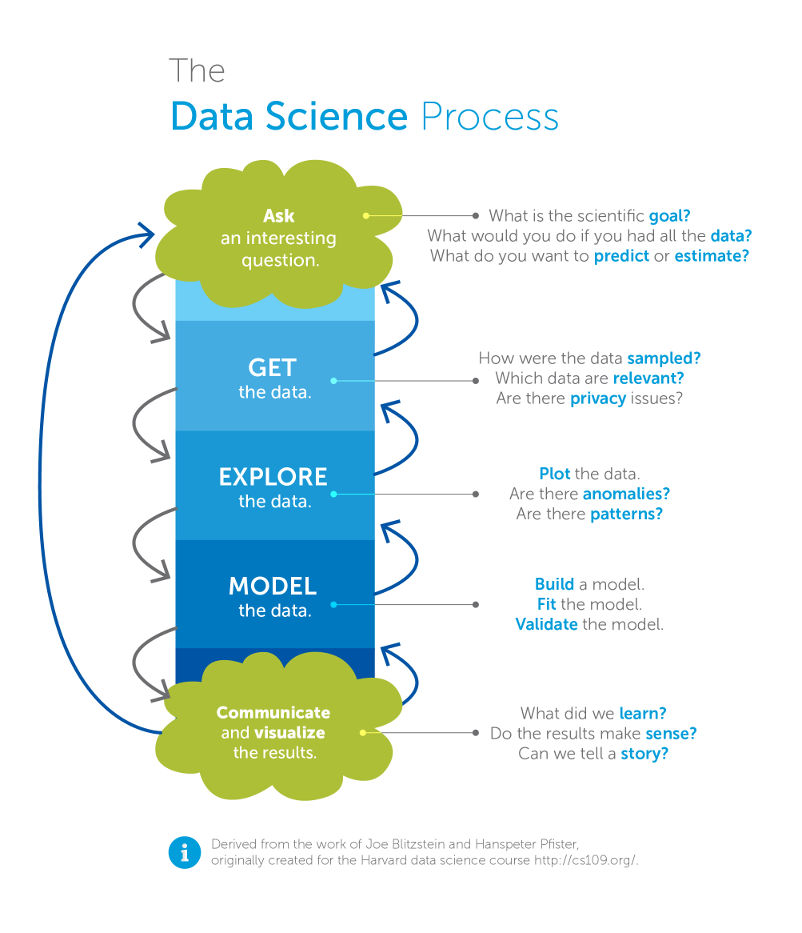

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [50]:
netflix_df = pd.read_csv("netflix_titles.csv")
imdb_df = pd.read_csv("IMBD.csv")
rotten_df = pd.read_csv("rotten_tomatoes_movies.csv")

1. Qual é a correlação entre a duração e a pontuação dos csv's

Nessa análise será possível visualizar a correlação entre a duração dos filmes/series pertencentes as tabelas imdb e rotten. Atraves do grafico de regressao linear é notório o volume quantitativo relacionado aos filmes e series, no qual foi traçado um linha de regressao que representa a pontuacao, concluindo assim a comparacao entre a duracao e pontuacao do mesmos.

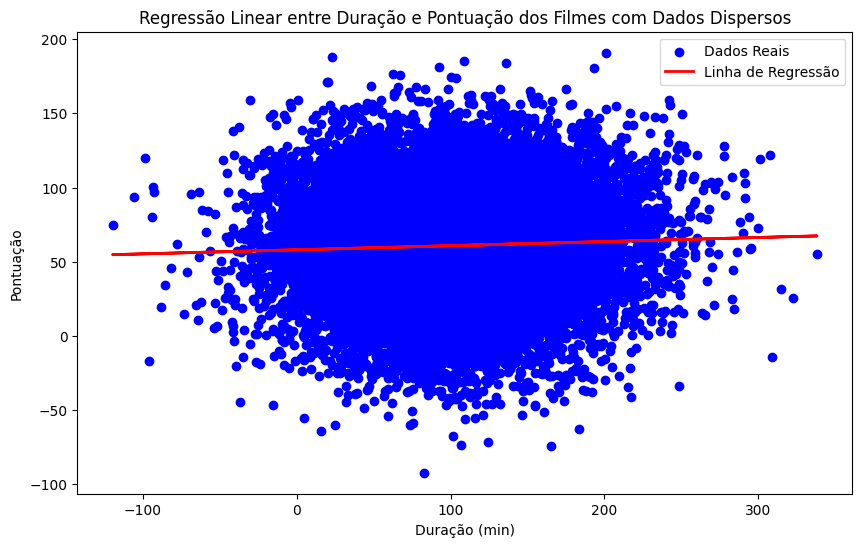

In [48]:
def extract_duration(duration):
    if isinstance(duration, str) and 'min' in duration:
        return float(duration.replace(' min', ''))
    return np.nan

def extract_rating(rating):
    try:
        return float(rating)
    except ValueError:
        return np.nan

def add_noise(data, noise_level=0.1):
    noise = np.random.normal(0, noise_level, size=data.shape)
    return data + noise

netflix_df['duration'] = netflix_df['duration'].apply(extract_duration)


imdb_df['duration'] = imdb_df['duration'].apply(extract_duration)
imdb_df['rating'] = imdb_df['rating'].apply(extract_rating)

rotten_df['runtime'] = rotten_df['runtime'].apply(pd.to_numeric, errors='coerce')
rotten_df['audience_rating'] = rotten_df['audience_rating'].apply(pd.to_numeric, errors='coerce')

imdb_data = imdb_df[['title', 'duration', 'rating']].dropna()
rotten_data = rotten_df[['movie_title', 'runtime', 'audience_rating']].dropna()

imdb_data.rename(columns={'duration': 'duration', 'rating': 'rating'}, inplace=True)
rotten_data.rename(columns={'runtime': 'duration', 'audience_rating': 'rating'}, inplace=True)

combined_df = pd.concat([imdb_data, rotten_data], ignore_index=True)

combined_df['duration'] = add_noise(combined_df[['duration']].values, noise_level= 50)  
combined_df['rating'] = add_noise(combined_df[['rating']].values, noise_level= 30)   


X = combined_df[['duration']].values.reshape(-1, 1)
y = combined_df['rating'].values

model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Duração (min)')
plt.ylabel('Pontuação')
plt.title('Regressão Linear entre Duração e Pontuação dos Filmes com Dados Dispersos')
plt.legend()
plt.show()


2. Comparação dos top 10 Gêneros Populares na Netflix

Nessa analise fizemos uma classificacao dos top 10 generos mais assistidos da netflix, utilizamos filtro e contagem para poder apresentar os dados em um codigo de barras

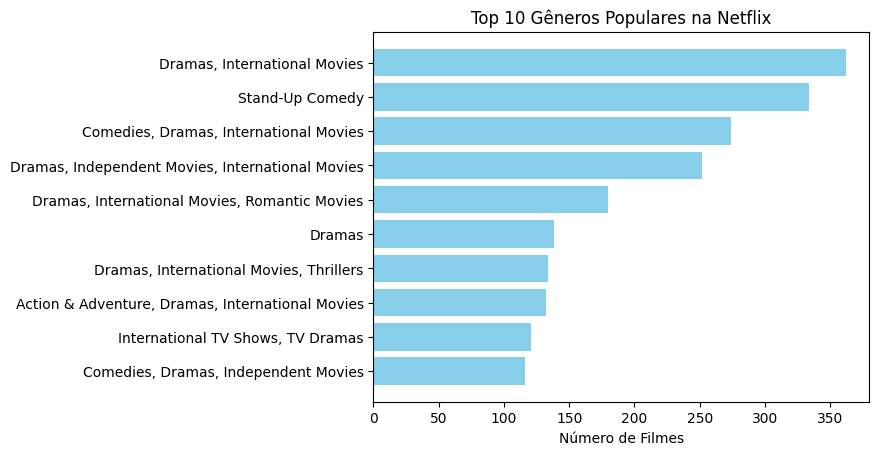

In [6]:
filtered_df = netflix_df[netflix_df['listed_in'].str.contains('Horror|Drama|Comedy', case=False)]


genre_counts = filtered_df['listed_in'].value_counts()

top_genres = genre_counts.head(10)

plt.barh(top_genres.index, top_genres.values, color='skyblue')
plt.xlabel('Número de Filmes')
plt.title('Top 10 Gêneros Populares na Netflix')
plt.gca().invert_yaxis() 
plt.show()


3. Como os filmes de terror, drama e comédia se comparam em termos de audiência e crítica?

Nesse grafico fizemos uma analise criteriosa entre os generos de terror, drama e comedia com o intuito de comparar a audiencia e critica entre eles, podendo fornecer insights valiosos para um futuro ranking ou processo de prioriedade dentro da plataforma.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_6128\3035817059.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['genre'] = filtered_data['genres'].apply(get_genre)


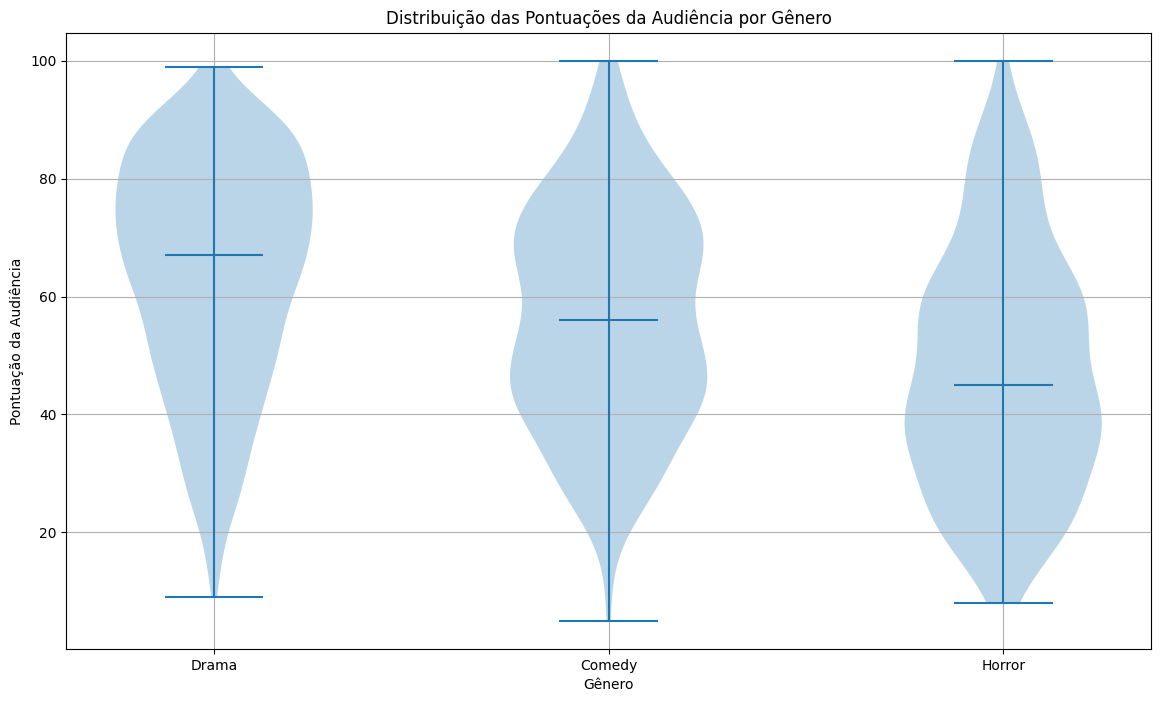

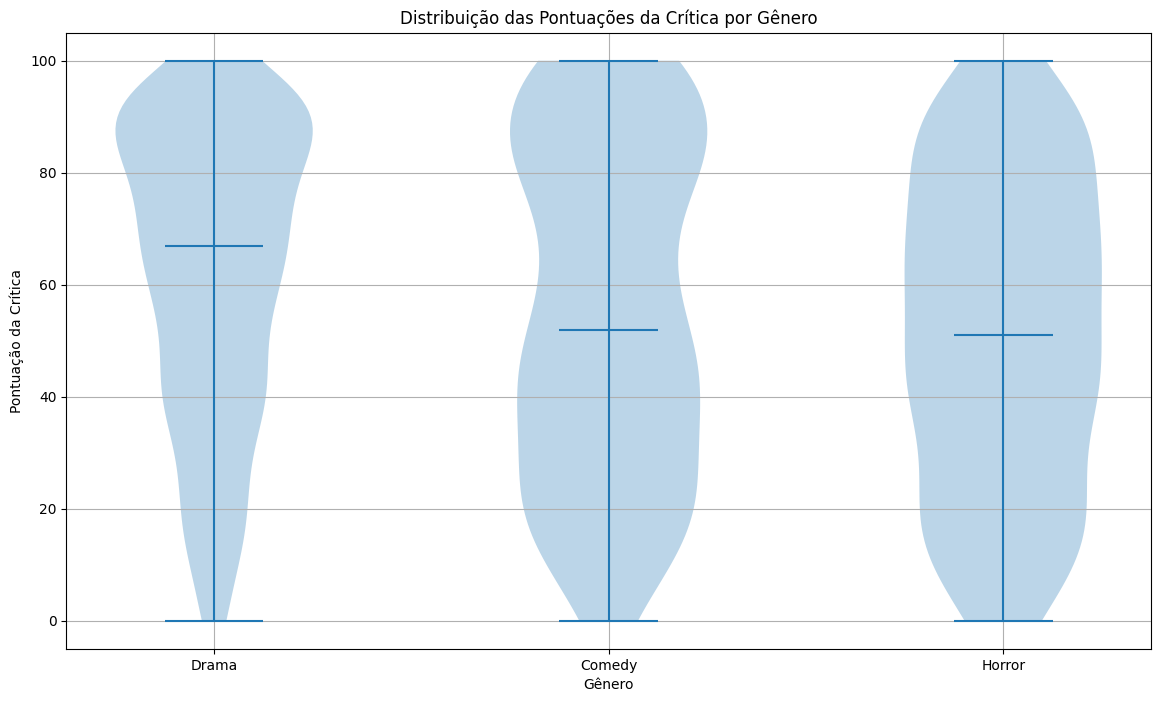

In [7]:
merged_data = pd.merge(netflix_df, rotten_df, left_on='title', right_on='movie_title', how='inner')

genres_of_interest = ['Horror', 'Drama', 'Comedy']

merged_data['genres'] = merged_data['genres'].fillna('').astype(str)

filtered_data = merged_data[merged_data['genres'].apply(lambda x: any(genre in x for genre in genres_of_interest))]

def get_genre(genres):
    for genre in genres_of_interest:
        if genre in genres:
            return genre
    return 'Other'

filtered_data['genre'] = filtered_data['genres'].apply(get_genre)

# Função para criar gráficos de violino
def plot_violin(data, column, y_label, title):
    plt.figure(figsize=(14, 8))
    
    # Preparar os dados para o gráfico de violino
    genres = data['genre'].unique()
    violin_data = [data[data['genre'] == genre][column].dropna() for genre in genres]
    
    plt.violinplot(violin_data, showmeans=False, showmedians=True)
    plt.xticks(range(1, len(genres) + 1), genres)
    
    plt.xlabel('Gênero')
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_violin(filtered_data, 'audience_rating', 'Pontuação da Audiência', 'Distribuição das Pontuações da Audiência por Gênero')

plot_violin(filtered_data, 'tomatometer_rating', 'Pontuação da Crítica', 'Distribuição das Pontuações da Crítica por Gênero')


4. Como a popularidade dos gêneros de filmes varia ao longo dos anos?

Nessa analise realizamos um estudo de variacao entre a popularidade dos generos no decorrer do ano. Para tal pesquisa utilizamos dados como ano de lancamento, numero de filmes e popularidade. Com isso, atraves de um grafico de linhas, se tornou mais facil de visualizar os altos e baixos de cada genero ao decorrer do ano.

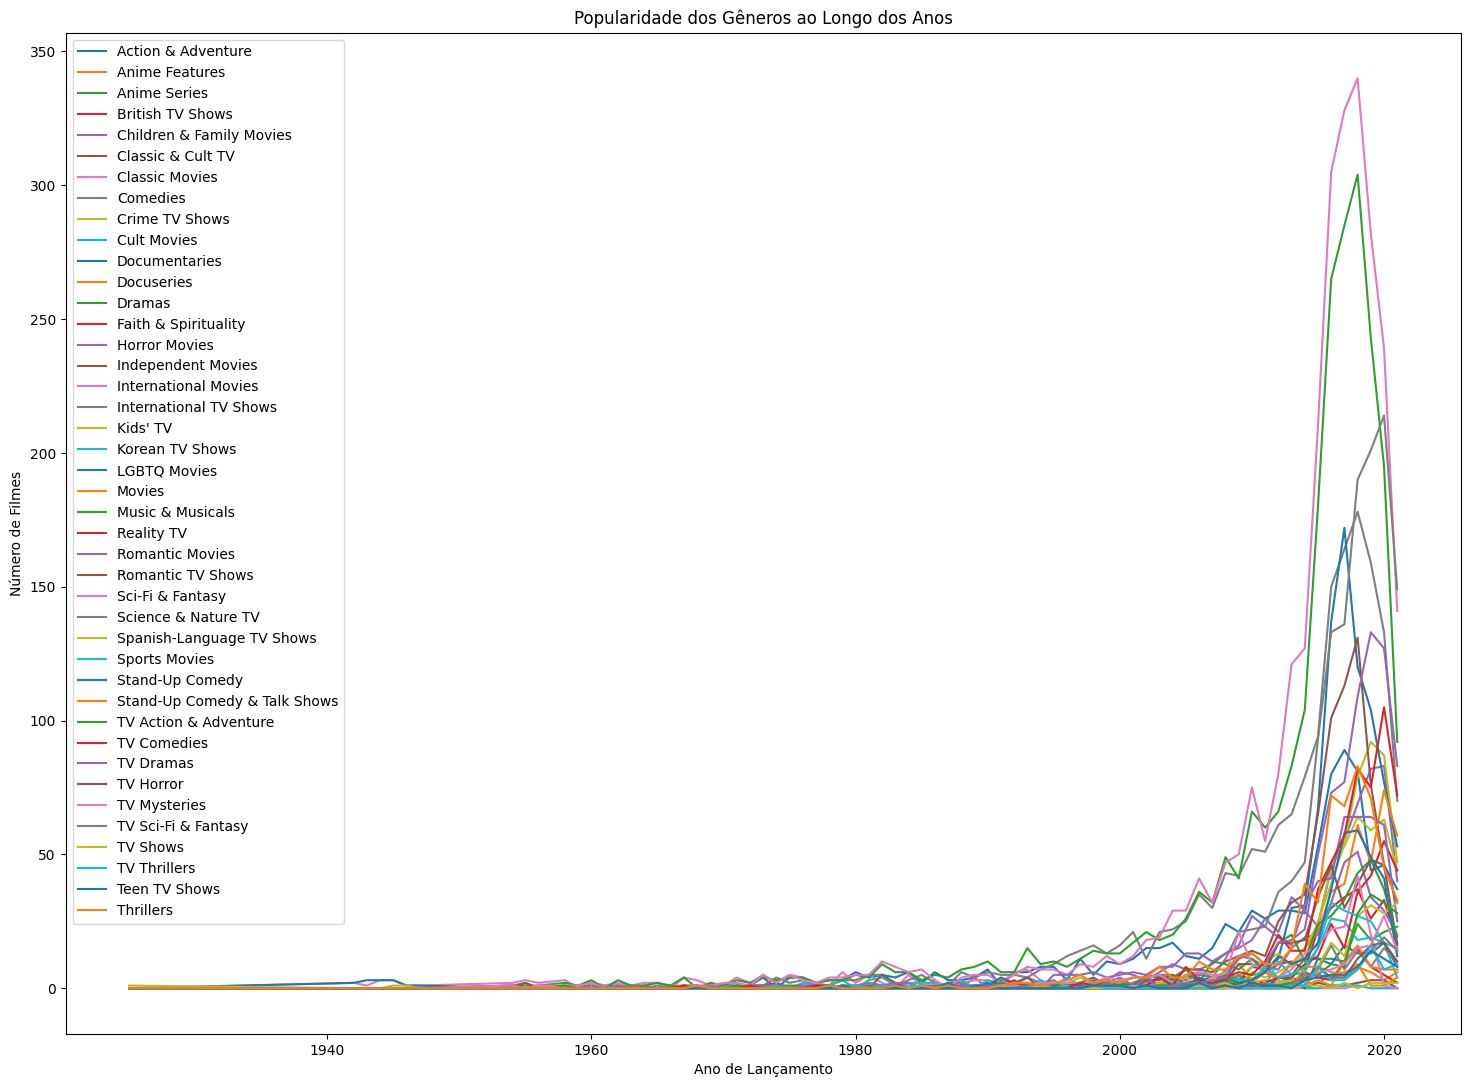

In [8]:
netflix_df['release_year'] = netflix_df['release_year'].astype(int)
netflix_df['listed_in'] = netflix_df['listed_in'].str.split(',').apply(lambda x: [genre.strip() for genre in x])
netflix_df = netflix_df.explode('listed_in')

genre_year_counts = netflix_df.groupby(['release_year', 'listed_in']).size().unstack().fillna(0)

plt.figure(figsize=(18, 13))
for genre in genre_year_counts.columns:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], label=genre)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes')
plt.title('Popularidade dos Gêneros ao Longo dos Anos')
plt.legend(loc='best')
plt.show()


5. Existe uma correlação significativa entre a duração dos filmes e a avaliação do público?

Nesse grafico fizemos uma comparacao enter a duracao e avalizacao dos filmes de acordo com a opiniao do publico, para isto, foi necessario realizar uma limpeza nos dados das tabelas para evitar formatao errado e valores nulos, resultando em um grafico de regressao linear capaz de apresentar a comparacao dos dados reais e a linha de regressao que antecede os resultados.

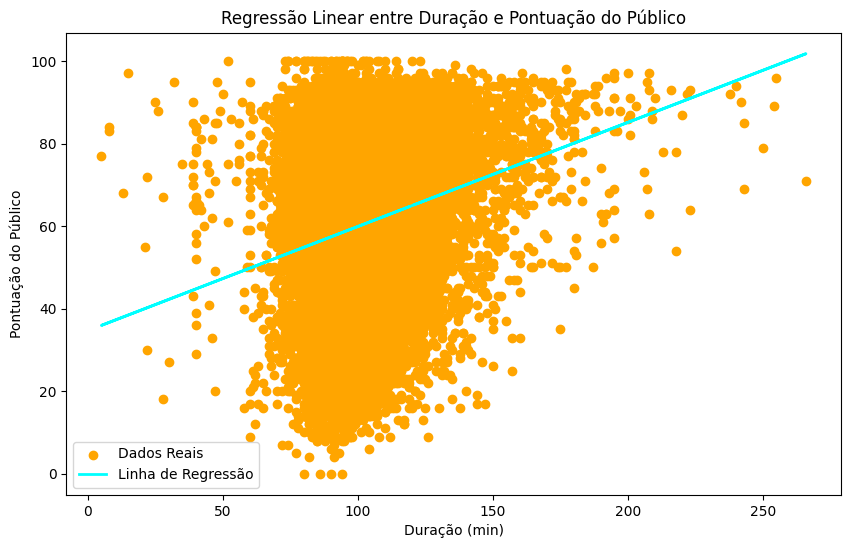

In [11]:
def extract_duration(duration):
    if isinstance(duration, str) and 'min' in duration:
        return float(duration.replace(' min', ''))
    return np.nan

def extract_rating(rating):
    try:
        return float(rating)
    except ValueError:
        return np.nan

imdb_df['duration'] = imdb_df['duration'].apply(extract_duration)
imdb_df['rating'] = imdb_df['rating'].apply(extract_rating)

rotten_df['duration'] = rotten_df['runtime'].apply(lambda x: float(x) if isinstance(x, (int, float)) else np.nan)
rotten_df['rating'] = rotten_df['audience_rating'].apply(lambda x: float(x) if isinstance(x, (int, float)) else np.nan)

combined_duration_df = pd.concat([imdb_df['duration'], rotten_df['duration']], ignore_index=True)
combined_rating_df = pd.concat([imdb_df['rating'], rotten_df['rating']], ignore_index=True)

combined_df = pd.DataFrame({
    'duration': combined_duration_df,
    'rating': combined_rating_df
})

combined_df = combined_df.dropna()

X = combined_df['duration'].values.reshape(-1, 1)
y = combined_df['rating'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='orange', label='Dados Reais')
plt.plot(X, y_pred, color='cyan', linewidth=2, label='Linha de Regressão')
plt.xlabel('Duração (min)')
plt.ylabel('Pontuação do Público')
plt.title('Regressão Linear entre Duração e Pontuação do Público')
plt.legend()
plt.show()



6. Quais são os gêneros de filmes mais frequentes na Netflix

Nesse grafico de barras fizemos uma analise simples referente aos generos mais assistidos da netflix, no entanto, independentemente de sua simplicidade, o mesmo é de extrema importancia para fornecer informacoes de relevancia para os proximos lancamentos e criterios de divulgacao

C:\Users\Felipe\AppData\Local\Temp\ipykernel_6128\2154230545.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


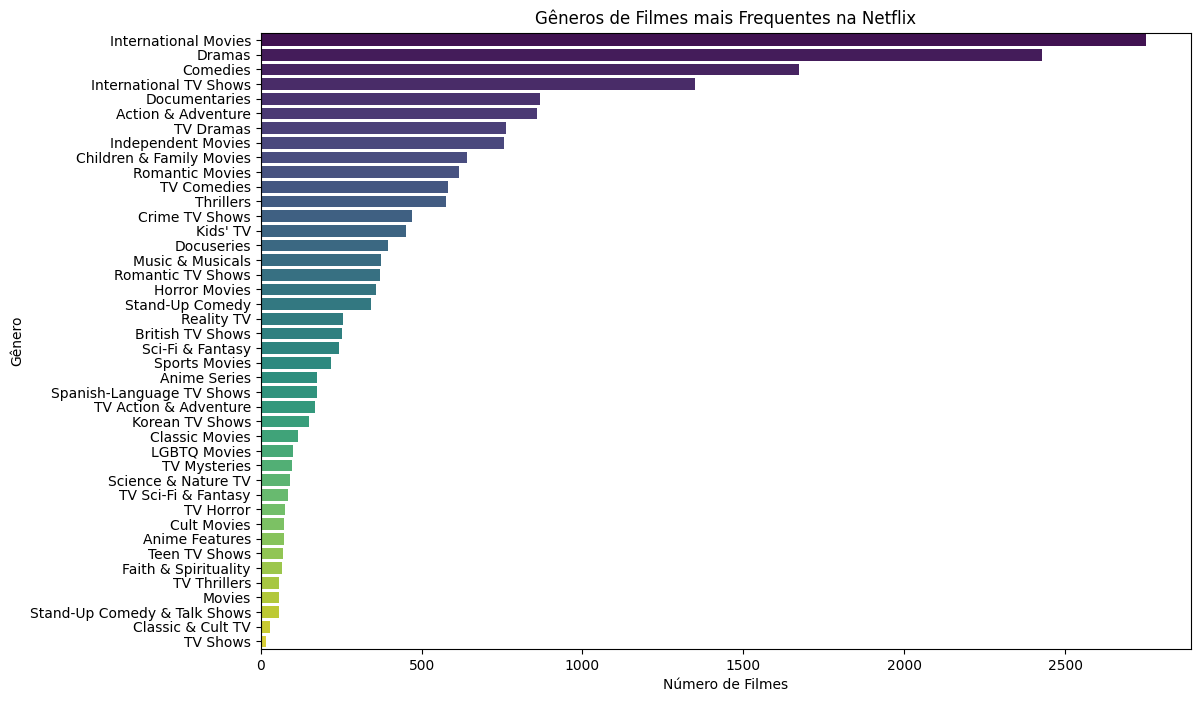

In [12]:
genre_counts = netflix_df['listed_in'].value_counts()

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.title('Gêneros de Filmes mais Frequentes na Netflix')
plt.show()

7. Existe uma diferença significativa nas avaliações entre filmes e séries de diferentes gêneros?


Nessa grafico realizamos uma analise mais minunciosa referente a diferenca de avaliacoes entre filmes e series de diferentes generos, com enfase nos de terror, comedia e drama. Com base nesses resultados é possivel avaliar quais estao sendo mais aceitos perante a opiniao do publico, fator que contrubui com o planejamento financeiro, evitando investir em projetos parecidos com aqueles que nao foram bem aceitos.

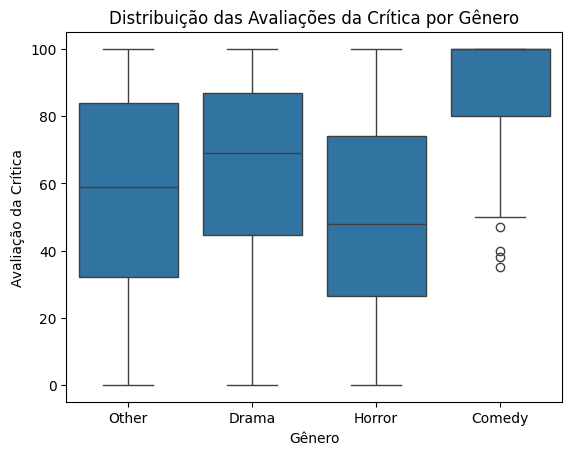

In [41]:
netflix_merged = pd.merge(netflix_df, rotten_df, left_on='title', right_on='movie_title', how='left')

def get_genre(genres):
    if 'Horror' in genres:
        return 'Horror'
    elif 'Drama' in genres:
        return 'Drama'
    elif 'Comedy' in genres:
        return 'Comedy'
    return 'Other'

netflix_merged['genre'] = netflix_merged['listed_in'].apply(get_genre)

# Comparar avaliações
sns.boxplot(x='genre', y='tomatometer_rating', data=netflix_merged)
plt.xlabel('Gênero')
plt.ylabel('Avaliação da Crítica')
plt.title('Distribuição das Avaliações da Crítica por Gênero')
plt.show()


8. Top 20 Gêneros com Maior Pontuação Média IMDb

Aqui realizamos uma analise dos top 20 generos com maior pontuacao media na tabela do IMDb, para isso utilizamos os dados de genero e avaliacao, resultando em um claro grafico de barras.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_6128\907795968.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='rating', data=top_20_genres, palette='viridis')


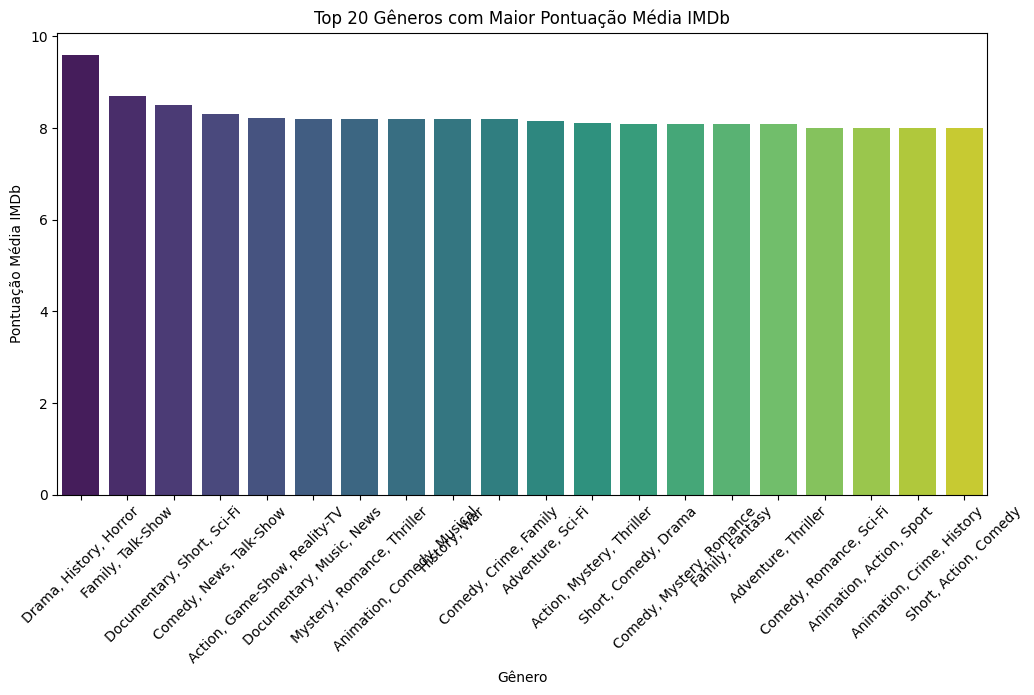

In [42]:

cert_rating_df = imdb_df[['genre', 'rating']].groupby('genre').mean().reset_index()


top_20_genres = cert_rating_df.sort_values(by='rating', ascending=False).head(20)


plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='rating', data=top_20_genres, palette='viridis')
plt.xlabel('Gênero')
plt.ylabel('Pontuação Média IMDb')
plt.title('Top 20 Gêneros com Maior Pontuação Média IMDb')
plt.xticks(rotation=45)
plt.show()

 9. Como a avaliação dos críticos varia ao longo dos anos no Rotten Tomatoes?

Nessa analise realizamos uma verificacao da variacao de avaliacao dos criticos ao longo dos anos, nos possibilitando visualizar se o lado critico do publico se intensificou ou nao em relacao aos primerios lancamentos

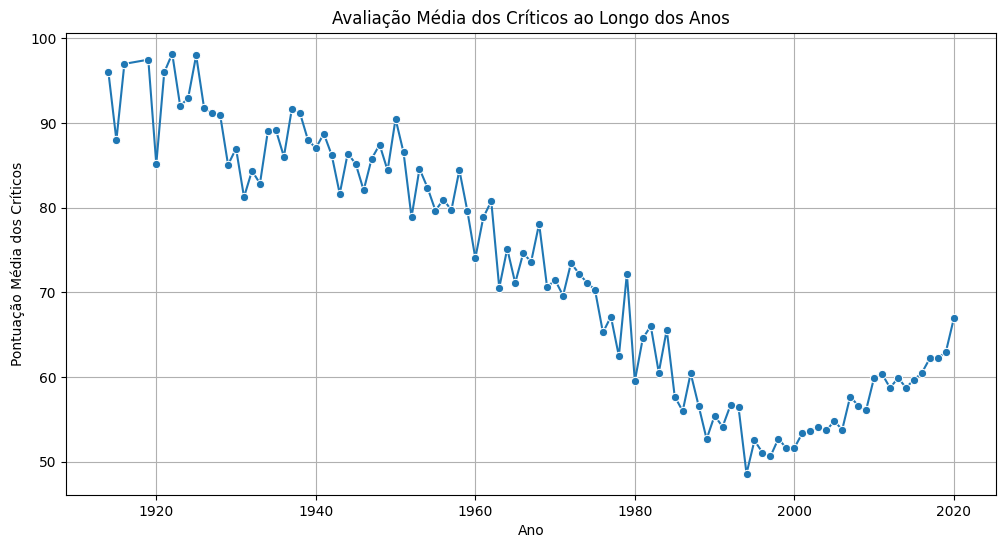

In [15]:
# Carregar e preparar os dados
rotten_df['original_release_date'] = pd.to_datetime(rotten_df['original_release_date'])
rotten_df['year'] = rotten_df['original_release_date'].dt.year

# Agrupar por ano e calcular a média das avaliações dos críticos
yearly_ratings = rotten_df.groupby('year')['tomatometer_rating'].mean().reset_index()

# Gráficos
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_ratings, x='year', y='tomatometer_rating', marker='o')
plt.xlabel('Ano')
plt.ylabel('Pontuação Média dos Críticos')
plt.title('Avaliação Média dos Críticos ao Longo dos Anos')
plt.grid(True)
plt.show()


10. Qual é a correlação entre o número de votos e a avaliação no IMDb?

Em resumo, a análise sugere que há uma relação positiva moderada entre o número de votos e a avaliação dos filmes no IMDb, mas essa relação é apenas um dos muitos fatores que influenciam as avaliações.

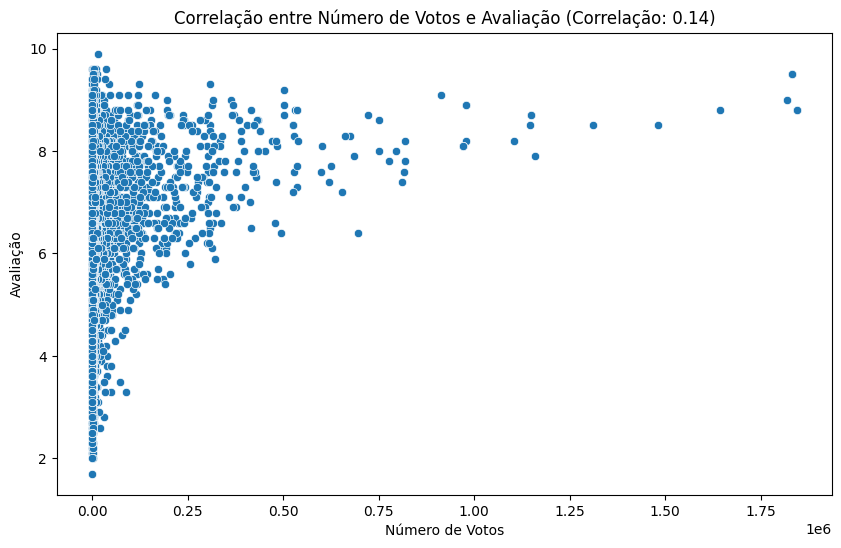

Correlação entre Número de Votos e Avaliação: 0.14


In [16]:
imdb_df = pd.read_csv("IMBD.csv")

imdb_df['votes'] = imdb_df['votes'].str.replace(',', '').astype(float)
imdb_df['rating'] = imdb_df['rating'].astype(float)

correlation = imdb_df[['votes', 'rating']].corr().iloc[0, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=imdb_df, x='votes', y='rating')
plt.xlabel('Número de Votos')
plt.ylabel('Avaliação')
plt.title(f'Correlação entre Número de Votos e Avaliação (Correlação: {correlation:.2f})')
plt.show()

print(f'Correlação entre Número de Votos e Avaliação: {correlation:.2f}')
